# Tensorflow

TensorFlow is a Python-based, free, open source machine learning platform, developed
primarily by Google. Much like NumPy, the primary purpose of TensorFlow is to
enable engineers and researchers to manipulate mathematical expressions over
numerical tensors. But TensorFlow goes far beyond the scope of NumPy in the following
ways:
 - It can automatically compute the gradient of any differentiable expression (...), making it highly suitable for machine learning.
 - It can run not only on CPUs, but also on GPUs and TPUs, highly parallel hardware
accelerators.
 - Computation defined in TensorFlow can be easily distributed across many
machines."

The fundamental objects in TensorFlow are **tensors**, which also appear in other deep learning platforms such as Pytorch. These are essentially arrays with extra structure that allows, among other things, to construct a computation graph, perform automatic differentiation, and optimize parallel computation using GPUs.

In [2]:
import tensorflow as tf

In [3]:
!nvidia-smi

Tue Feb 24 11:26:02 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.82.07              Driver Version: 580.82.07      CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
t1 = tf.ones(shape = (2,1))
print(t1)
# metadata
print(t1.numpy())
print(t1.shape)
print(t1.dtype)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
[[1.]
 [1.]]
(2, 1)
<dtype: 'float32'>


"A significant difference between NumPy arrays and TensorFlow tensors is that TensorFlow tensors aren’t assignable: they’re constant"

"To train a model, we’ll need to update its state, which is a set of tensors. If tensors aren’t assignable, how do we do it? That’s where variables come in. tf.Variable is the class meant to manage modifiable state in TensorFlow."

In [5]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)
v[0,0].assign(3.)
print(v)



<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.8421411 ],
       [-0.78295106],
       [ 0.24056406]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 3.        ],
       [-0.78295106],
       [ 0.24056406]], dtype=float32)>


# GradientTape - computing gradients with tensorflow.

"NumPy can’t do: retrieve the gradient of any differentiable expression with respect to any of its inputs."

In [6]:
input_var = tf.Variable(initial_value=-2.)

with tf.GradientTape() as tape:
  result = tf.square(input_var)

gradient = tape.gradient(result,input_var)
print(gradient)

tf.Tensor(-4.0, shape=(), dtype=float32)


In [7]:
@tf.function
def model_linear(x,w,b):
  return x*w+b

@tf.function
def model_sigmoid(x,w,b):
  return tf.sigmoid(x*w+b)

@tf.function
def mse(outs,labels):
  return tf.reduce_mean(tf.square(outs-labels))

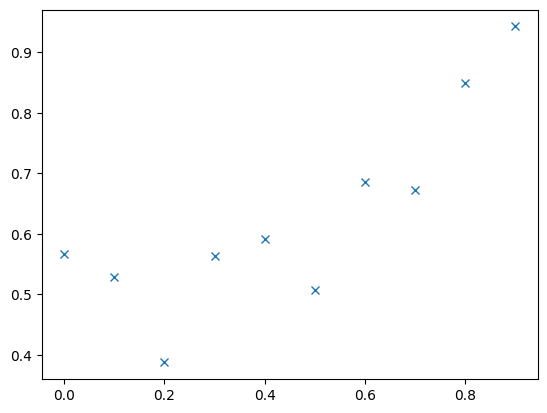

In [9]:
import matplotlib.pyplot as plt

inputs = tf.Variable(tf.range(0.,1.,.1))
labels = tf.sigmoid(2*inputs - 1) + tf.random.uniform(shape = inputs.shape, minval=0., maxval=.3)


plt.plot(inputs,labels,"x")

In [11]:
# initialization
w = tf.Variable(tf.random.normal(shape=()))
b = tf.Variable(tf.zeros(shape=()))

In [12]:
num_epochs = 100
lr = .1

# implement training loop here.
for epochs in range(num_epochs):
  with tf.GradientTape() as tape:
    outs = model_sigmoid(inputs,w,b)
    loss = mse(outs,labels)
  gradients = tape.gradient(loss,(w,b))
  w.assign_sub(lr*gradients[0])
  b.assign_sub(lr*gradients[1])
  print(loss)

tf.Tensor(0.044845134, shape=(), dtype=float32)
tf.Tensor(0.044127036, shape=(), dtype=float32)
tf.Tensor(0.04342959, shape=(), dtype=float32)
tf.Tensor(0.042752292, shape=(), dtype=float32)
tf.Tensor(0.04209459, shape=(), dtype=float32)
tf.Tensor(0.04145599, shape=(), dtype=float32)
tf.Tensor(0.040835984, shape=(), dtype=float32)
tf.Tensor(0.04023405, shape=(), dtype=float32)
tf.Tensor(0.039649725, shape=(), dtype=float32)
tf.Tensor(0.039082516, shape=(), dtype=float32)
tf.Tensor(0.03853194, shape=(), dtype=float32)
tf.Tensor(0.037997536, shape=(), dtype=float32)
tf.Tensor(0.03747884, shape=(), dtype=float32)
tf.Tensor(0.036975432, shape=(), dtype=float32)
tf.Tensor(0.03648684, shape=(), dtype=float32)
tf.Tensor(0.036012657, shape=(), dtype=float32)
tf.Tensor(0.035552453, shape=(), dtype=float32)
tf.Tensor(0.035105832, shape=(), dtype=float32)
tf.Tensor(0.034672387, shape=(), dtype=float32)
tf.Tensor(0.034251723, shape=(), dtype=float32)
tf.Tensor(0.033843465, shape=(), dtype=float32)

# Keras


"Keras is a deep learning API for Python, built on top of TensorFlow, that provides a convenient
way to define and train any kind of deep learning model."

"The fundamental data structure in neural networks is the *layer*."

"A simple API should have a single abstraction around which everything is centered. In
Keras, that’s the Layer class. Everything in Keras is either a Layer or something that
closely interacts with a Layer."

In [13]:
# A Dense layer implemented as a (Keras) Layer subclass
#
import tensorflow as tf
from tensorflow import keras

class SimpleDense(keras.layers.Layer):  # All Keras layers inherit from the base Layer class.

  def __init__(self, units, activation=None):
    super().__init__()
    self.units = units
    self.activation = activation

  def build(self, input_shape):  # Weight creation takes place in the build() method. This is different from our numpy implementation
    input_dim = input_shape[-1]
    self.W = self.add_weight(shape=(input_dim, self.units),
                             initializer="random_normal")
    self.b = self.add_weight(shape=(self.units,),
                             initializer="zeros")

  def call(self, inputs):
    y = tf.matmul(inputs, self.W) + self.b
    if self.activation is not None:
      y = self.activation(y)
    return y

In [14]:
layer = SimpleDense(32, activation=tf.nn.relu)

In practice we will use the built-in dense layer class from keras.

In [ ]:
from tensorflow.keras import layers

inputs = tf.ones(shape = (1,784))

layer = layers.Dense(32, activation="relu")

layer(inputs)
layer.weights  # weights here means weights and bias

"When using Keras, you don’t have to worry about size compatibility most of the
time, because the layers you add to your models are dynamically built to match the shape of the incoming layer."

As an example consider the following construction of a neural network with 2 layers using the *Sequential* method.   

In [2]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(10)
])

In [3]:
model.summary() # model summary has some undefined features

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
from tensorflow.keras.datasets import cifar10
(train_images, train_labels), (val_images, val_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [13]:
val_images.shape


(10000, 32, 32, 3)

## Model Train

In [33]:
train_images_resh = train_images.reshape((50000, 32 * 32 * 3))
train_inputs = train_images_resh.astype("float32") / 255
val_images_resh = val_images.reshape((10000, 32 * 32 * 3))
val_inputs = val_images_resh.astype("float32") / 255

In [ ]:
model = models.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(10,"softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy", # note that the labels are integers, they're not categorical, that's why we are using this loss
              metrics=["accuracy"])

In [32]:
history = model.fit(
            train_inputs,
            train_labels,
            epochs=10,
            batch_size=128,
            validation_data=(val_inputs, val_labels)
)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.2399 - loss: 2.1200 - val_accuracy: 0.3485 - val_loss: 1.8404
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3483 - loss: 1.8358 - val_accuracy: 0.3787 - val_loss: 1.7661
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3714 - loss: 1.7758 - val_accuracy: 0.3756 - val_loss: 1.7640
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3868 - loss: 1.7415 - val_accuracy: 0.3635 - val_loss: 1.7873
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3910 - loss: 1.7298 - val_accuracy: 0.3950 - val_loss: 1.7066
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4038 - loss: 1.6917 - val_accuracy: 0.4021 - val_loss: 1.6928
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4105 - loss: 1.6809 - val_accuracy: 0.3959 - val_loss: 1.7018
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4107 - loss: 1.6680 - val_accuracy: 0.

In [16]:
# Graphical visualization of history
#
import matplotlib.pyplot as plt
#
def plot_training_curves(history):
  history_dict = history.history # obtaining the history dictionary from the history object
  #
  acc = history_dict["accuracy"]
  val_acc = history_dict["val_accuracy"]
  loss = history_dict["loss"]
  val_loss = history_dict["val_loss"]
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, "bo", label="Training accuracy")
  plt.plot(epochs, val_acc, "b", label="val accuracy")
  plt.title("Training and validation accuracy")
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, "bo", label="Training loss")
  plt.plot(epochs, val_loss, "b", label="val loss")
  plt.title("Training and validation loss")
  plt.legend()
  plt.show()

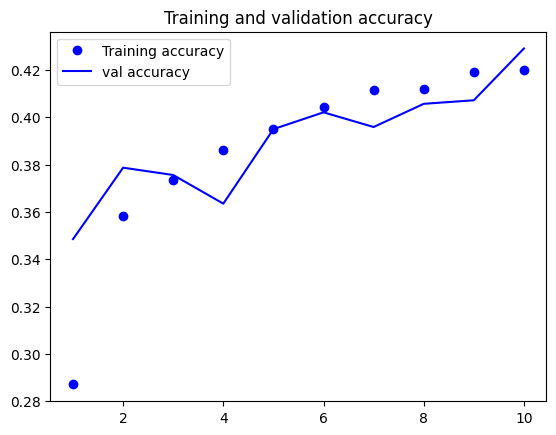

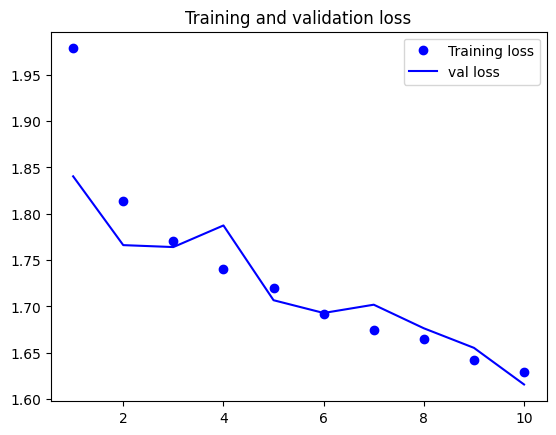

In [34]:
plot_training_curves(history)

## Categorical labels

In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels_cat = to_categorical(train_labels, num_classes=10)
val_labels_cat   = to_categorical(val_labels, num_classes=10)

In [41]:
model = models.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(10,"softmax")
])

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [39]:
print(train_inputs.shape)
print(train_labels_cat.shape)
print(val_inputs.shape)
print(val_labels_cat.shape)

(50000, 3072)
(50000, 10)
(10000, 3072)
(10000, 10)


In [42]:
history = model.fit(
    train_inputs,
    train_labels_cat,
    epochs=10,
    batch_size=128,
    validation_data=(val_inputs, val_labels_cat)
)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2629 - loss: 2.0493 - val_accuracy: 0.3627 - val_loss: 1.8275
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3591 - loss: 1.8340 - val_accuracy: 0.3614 - val_loss: 1.8073
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3804 - loss: 1.7663 - val_accuracy: 0.3896 - val_loss: 1.7371
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3943 - loss: 1.7277 - val_accuracy: 0.4037 - val_loss: 1.7029
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4034 - loss: 1.6965 - val_accuracy: 0.4042 - val_loss: 1.6893
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4141 - loss: 1.6666 - val_accuracy: 0.4114 - val_loss: 1.6724
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4212 - loss: 1.6446 - val_accuracy: 0.4179 - val_loss: 1.6471
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4248 - loss: 1.6339 - val_accuracy: 0.

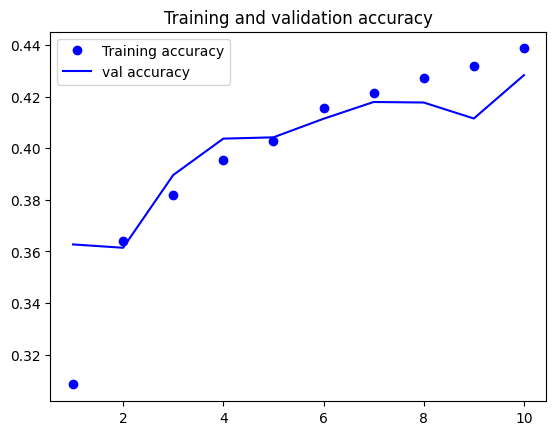

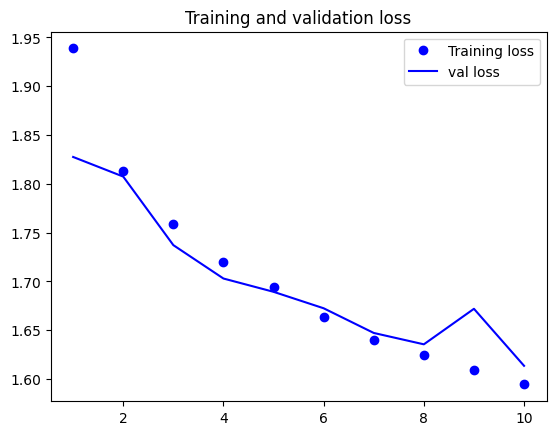

In [43]:
plot_training_curves(history)